 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [124]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [125]:
whale_data = Path("./whale_returns.csv")


In [126]:
# Convert date strings into datetime objects and set the datetime as the index
whale_data = pd.read_csv(whale_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Reading whale returns
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [127]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [128]:
# Drop nulls
whale_data = whale_data.dropna().copy()
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [129]:
# Reading algorithmic returns
algo_data = Path("./algo_returns.csv")
# Convert date strings into datetime objects and set the datetime as the index
algo_data = pd.read_csv(algo_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Reading whale returns
print(whale_data.dtypes)
algo_data.head()

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [130]:
# Count nulls
print(algo_data.count())
print(algo_data.isnull().count())
print(algo_data.isnull().mean())
#Algo 1 and 2 data is showing nulls in every data point. Removed 
algo_data.head(10)

Algo 1    1241
Algo 2    1235
dtype: int64
Algo 1    1241
Algo 2    1241
dtype: int64
Algo 1    0.000000
Algo 2    0.004835
dtype: float64


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [131]:
print(algo_data.isnull().mean())
# Drop nulls
algo_data = algo_data.dropna().copy()
algo_data.head(10)

Algo 1    0.000000
Algo 2    0.004835
dtype: float64


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


In [132]:
# Reading S&P TSX 60 Closing Prices
sptsx_data = Path("./sp_tsx_history.csv")
sptsx_data = pd.read_csv(sptsx_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

sptsx_data.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [133]:
# Check Data Types
sptsx_data.dtypes

Close    object
dtype: object

In [134]:
# Fix Data Types
sptsx_data["Close"] = sptsx_data["Close"].str.replace("$", "")
sptsx_data["Close"] = sptsx_data["Close"].str.replace(",", "")
sptsx_data['Close'] = sptsx_data['Close'].astype('float')
sptsx_data.head()

/var/folders/yv/rbj2pfd549sbyfb_bqknpjpc0000gn/T/ipykernel_1589/1716638109.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx_data["Close"] = sptsx_data["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [135]:
# Calculate Daily Returns
sptsx_data_dr = sptsx_data.pct_change()
sptsx_data_dr

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [136]:
# Drop nulls
sptsx_data_dr.dropna().copy()
print(sptsx_data_dr.isnull().mean())

Close    0.00055
dtype: float64


In [137]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_data_dr = sptsx_data_dr.rename(columns={"Close":"SPX 500 Returns"})
sptsx_data_dr.head()

,SPX 500 Returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [138]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
comb_port = pd.concat([whale_data, algo_data, sptsx_data_dr], axis='columns', join='inner')
comb_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

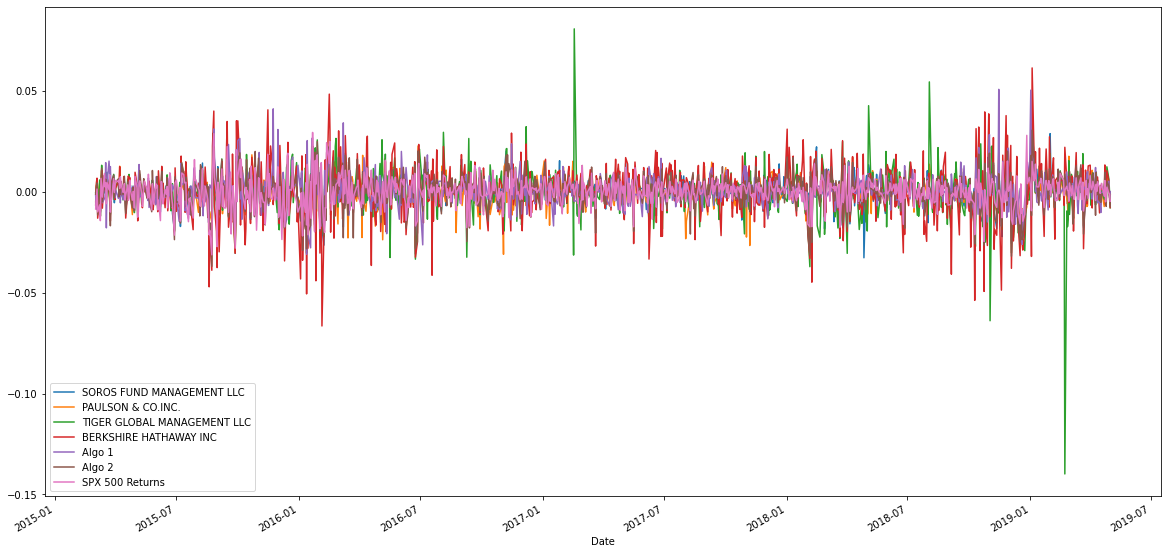

In [139]:
# Plot daily returns of all portfolios
comb_port.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

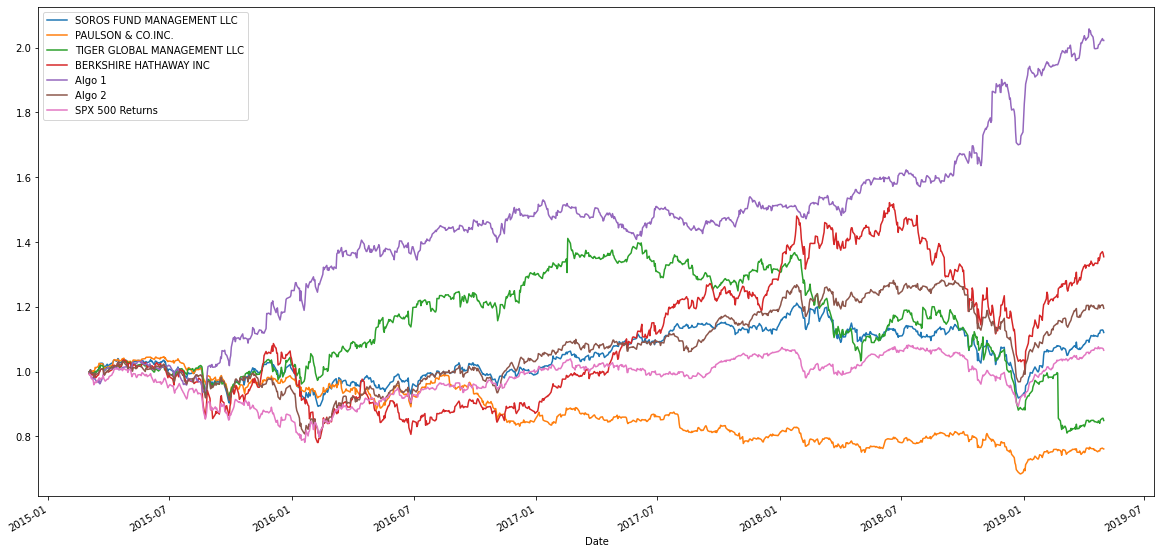

In [140]:
# Calculate cumulative returns of all portfolios
comb_port_returns = (1 + comb_port).cumprod()

# Plot cumulative returns
comb_port_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risky Box Plot'}>

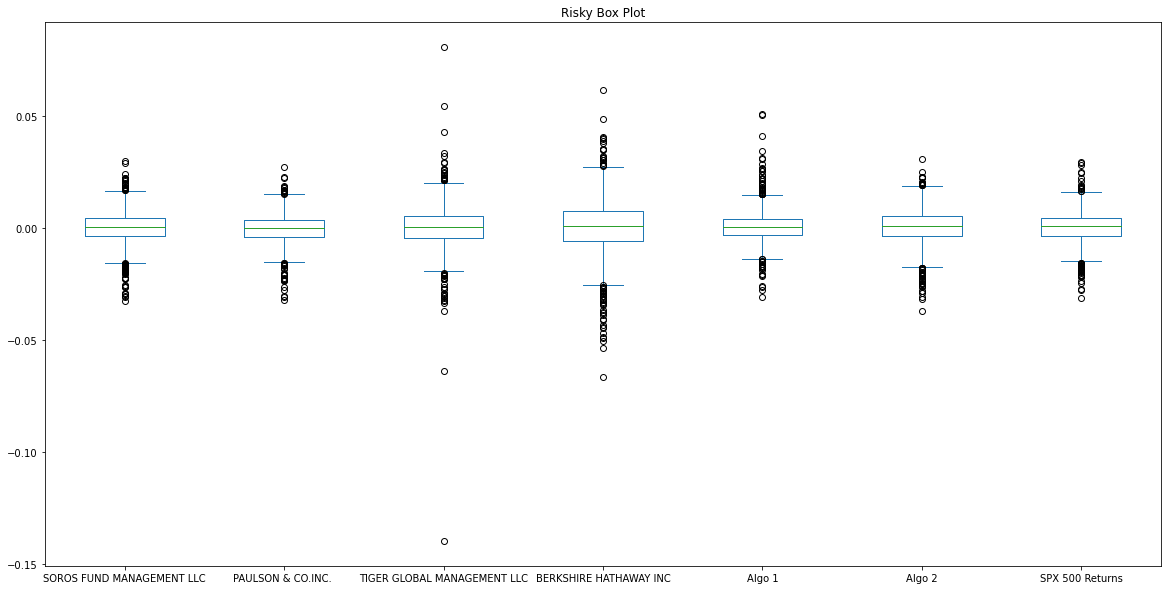

In [141]:
# Box plot to visually show risk
comb_port.plot(kind = "box", title= "Risky Box Plot", figsize = (20,10))

### Calculate Standard Deviations

In [142]:
# Calculate the daily standard deviations of all portfolios
comb_port_std = pd.DataFrame(comb_port.std())
comb_port_std

,0
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SPX 500 Returns,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [143]:
# Calculate the daily standard deviation of S&P TSX 60
sptsx_data_std = comb_port["SPX 500 Returns"].std()
sptsx_data_std
# Determine which portfolios are riskier than the S&P TSX 60
comb_port_std = comb_port_std.sort_values((0), ascending = False) 
print(comb_port_std)
risky_std = comb_port_std[comb_port_std > sptsx_data_std]


                                    0
BERKSHIRE HATHAWAY INC       0.012826
TIGER GLOBAL MANAGEMENT LLC  0.010883
Algo 2                       0.008326
SOROS FUND MANAGEMENT LLC    0.007828
Algo 1                       0.007589
SPX 500 Returns              0.007034
PAULSON & CO.INC.            0.006982


### Calculate the Annualized Standard Deviation

In [144]:
# Calculate the annualized standard deviation (252 trading days)
annualized_comb_port_std = comb_port_std * np.sqrt(252)
annualized_comb_port_std

,0
BERKSHIRE HATHAWAY INC,0.203599
TIGER GLOBAL MANAGEMENT LLC,0.172759
Algo 2,0.132177
SOROS FUND MANAGEMENT LLC,0.124259
Algo 1,0.120470
SPX 500 Returns,0.111664
PAULSON & CO.INC.,0.110841


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'STD over 21 days'}, xlabel='Date'>

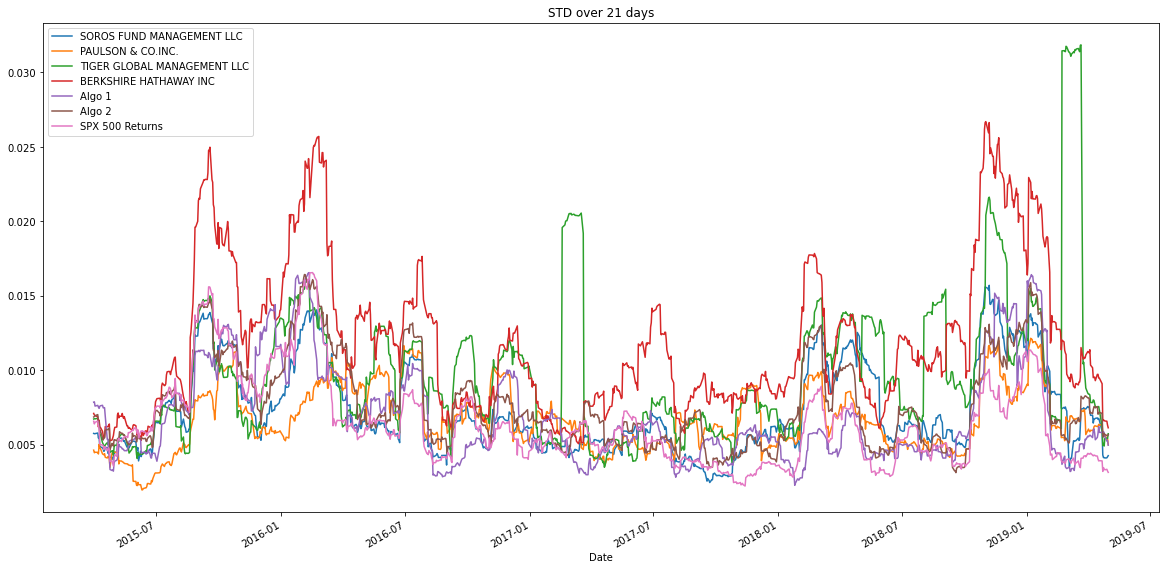

In [145]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
comb_port_21 = comb_port.rolling(window=21).std()
# Plot the rolling standard deviation
comb_port_21.plot(title= "STD over 21 days", figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

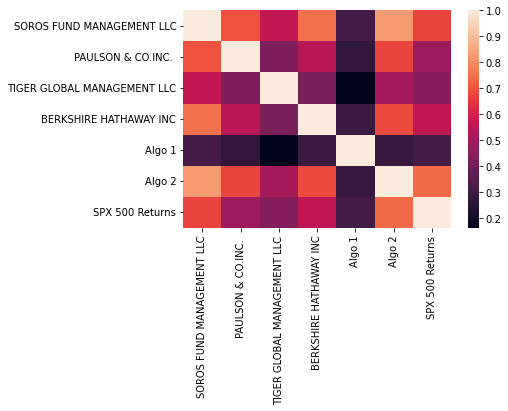

In [146]:
# Calculate the correlation
comb_port_corr = comb_port.corr()
# Display de correlation matrix
sns.heatmap(comb_port_corr)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'beta over 21 days'}, xlabel='Date'>

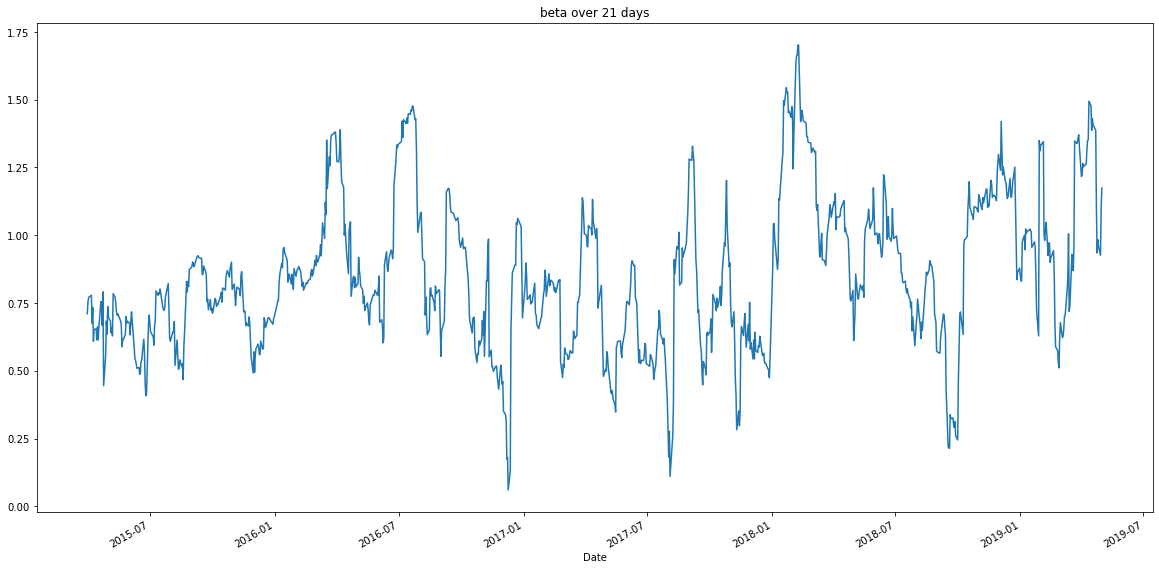

In [147]:
# Calculate covariance of a single portfolio
algo2_data_cov = comb_port['Algo 2'].cov(comb_port['SPX 500 Returns'])
algo2_data_cov
# Calculate variance of S&P TSX & rolling variance for later use (21 days)
spx_var = comb_port['SPX 500 Returns'].var()
tsx_rolling_var = comb_port['SPX 500 Returns'].rolling(window=21).var()

# Calculate rolling covariance for Algo2 (21 days)
algo2_rolling_cov = comb_port['Algo 2'].rolling(window = 21).cov(comb_port['SPX 500 Returns'])

# Calculate variance of S&P TSX

algo_variance = comb_port['Algo 2'].var()
tsx_rolling_variance = comb_port['SPX 500 Returns'].rolling(window=60).var()

# Computing beta
algo2_beta = algo2_data_cov / spx_var
algo2_rolling_beta = algo2_rolling_cov / tsx_rolling_var

# Plot beta trend
algo2_rolling_beta.plot(title= "beta over 21 days", figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM over 21 days'}, xlabel='Date'>

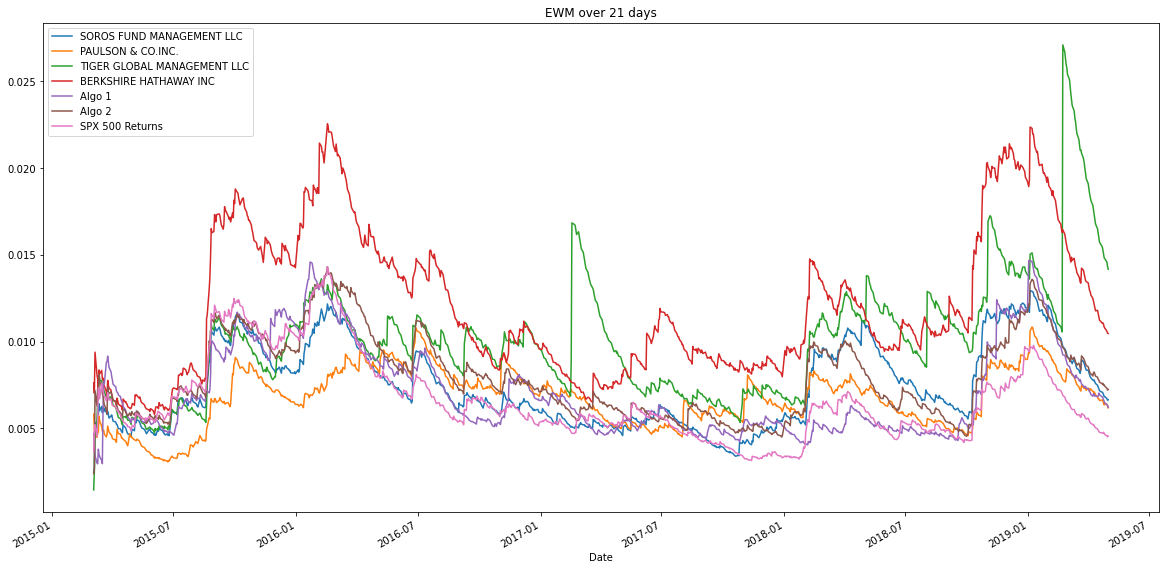

In [148]:
# Use `ewm` to calculate the rolling window
ewm_data = comb_port.ewm(halflife=21).std()
 
ewm_data.plot(title= "EWM over 21 days", figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [149]:
# Annualized Sharpe Ratios
sharpe_ratio_data = (comb_port.mean() * 252) / (comb_port.std() * np.sqrt(252))

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SPX 500 Returns                0.195550
dtype: float64

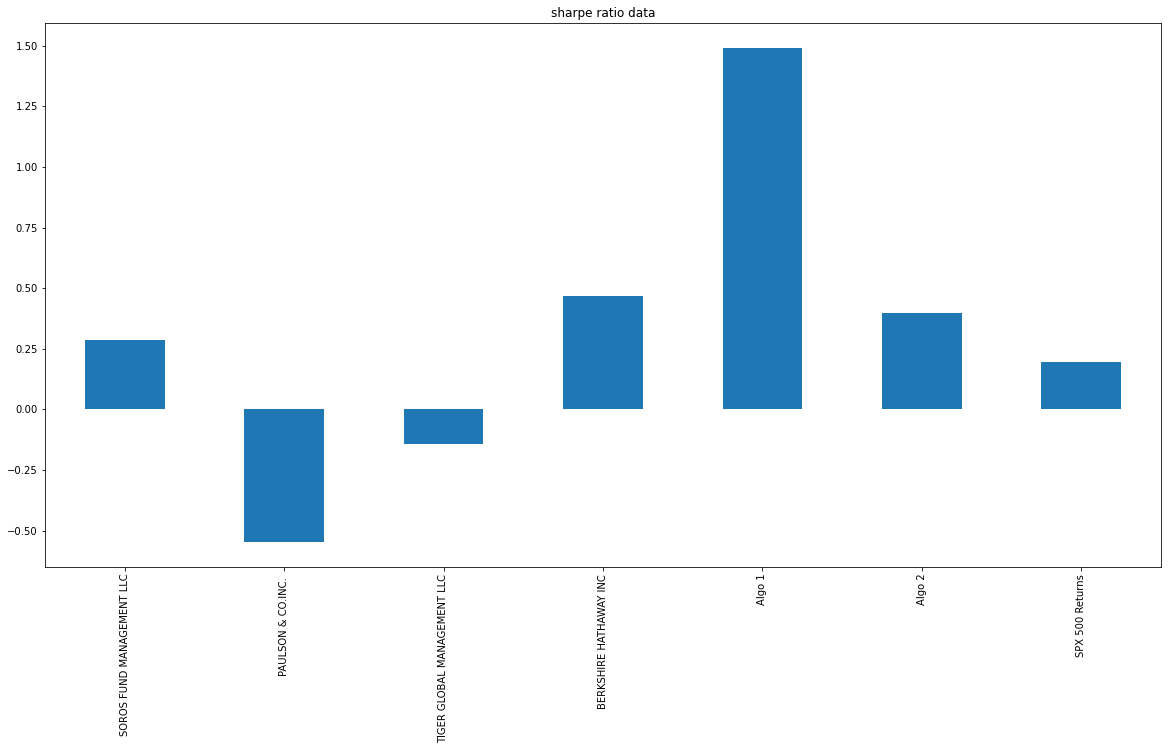

In [150]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_data.plot.bar(title= "sharpe ratio data", figsize = (20,10))
sharpe_ratio_data 

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!
The Sharpe ratio is a measure of return often used to compare the performance of investment portfolios. As a higher Sharpe ratio generally indicates good investment performance we can say that Algo 1 is doing well compared to the other portfolios considering the risk.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [151]:
# Reading data from 1st stock
aapl_data = Path("./AAPL_US.csv")
aapl_data = pd.read_csv(aapl_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
clean_aapl_data = aapl_data.drop(columns =["Open", "High", "Low", "Volume"])
clean_aapl_data.head()

,Code,Close
Date,,
2021-09-09,AAPL:US,154.07
2021-09-10,AAPL:US,148.97
2021-09-13,AAPL:US,149.55
2021-09-14,AAPL:US,148.12
2021-09-15,AAPL:US,149.03


In [152]:
# Reading data from 2nd stock
cxo_data = Path("./CXO.csv")
cxo_data = pd.read_csv(cxo_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
clean_cxo_data = cxo_data.drop(columns =["Open", "High", "Low", "Volume", "Trades", "Value"])


In [153]:
# Reading data from 3rd stock
ppm_data = Path("./PPM.csv")
ppm_data = pd.read_csv(ppm_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
clean_ppm_data = ppm_data.drop(columns =["Open", "High", "Low", "Volume", "Trades", "Value"])


In [154]:
# Combine all stocks in a single DataFrame

my_stocks = pd.concat([clean_aapl_data, clean_cxo_data, clean_ppm_data], axis='rows', join='inner')
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head(10)


,Code,Close
Date,,
2021-09-08,PPM,2.660
2021-09-08,CXO,0.345
2021-09-09,CXO,0.330
2021-09-09,PPM,2.590
2021-09-09,AAPL:US,154.070
2021-09-10,AAPL:US,148.970
2021-09-10,CXO,0.340
2021-09-10,PPM,2.480
2021-09-13,AAPL:US,149.550


In [155]:
# Reset Date index

In [156]:
# Reorganize portfolio data by having a column per symbol
my_stocks_reorg = my_stocks.pivot_table(values='Close',index='Date',columns='Code')
my_stocks_reorg.head()

Code,AAPL:US,CXO,PPM
Date,,,
2021-09-08,NaN,0.345,2.66
2021-09-09,154.07,0.330,2.59
2021-09-10,148.97,0.340,2.48
2021-09-13,149.55,0.350,2.44
2021-09-14,148.12,0.445,2.49


In [157]:
# Calculate daily returns
my_daily_returns = my_stocks_reorg.pct_change()

# Drop NAs
print(my_daily_returns.isnull().count())
my_daily_returns = my_daily_returns.dropna()
print(my_daily_returns.isnull().count())
# Display sample data
my_daily_returns.sample

Code
AAPL:US    260
CXO        260
PPM        260
dtype: int64
Code
AAPL:US    258
CXO        258
PPM        258
dtype: int64


<bound method NDFrame.sample of Code         AAPL:US       CXO       PPM
Date                                    
2021-09-10 -0.033102  0.030303 -0.042471
2021-09-13  0.003893  0.029412 -0.016129
2021-09-14 -0.009562  0.271429  0.020492
2021-09-15  0.006144  0.022472  0.024096
2021-09-16 -0.001610  0.000000  0.011765
...              ...       ...       ...
2022-09-01  0.004707 -0.032143 -0.041534
2022-09-02 -0.013611 -0.051661  0.006667
2022-09-05  0.000000  0.058366 -0.013245
2022-09-06 -0.008215  0.099265 -0.013423
2022-09-07  0.000000  0.020067  0.013605

[258 rows x 3 columns]>

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [158]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

my_port_returns = my_daily_returns.dot(weights)
# Display sample data
my_port_returns

Date
2021-09-10   -0.015090
2021-09-13    0.005725
2021-09-14    0.094119
2021-09-15    0.017571
2021-09-16    0.003385
                ...   
2022-09-01   -0.022990
2022-09-02   -0.019535
2022-09-05    0.015040
2022-09-06    0.025876
2022-09-07    0.011224
Length: 258, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [159]:
# Join your returns DataFrame to the original returns DataFrame
comb_port["My Returns"] = my_port_returns
comb_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX 500 Returns,My Returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN


In [160]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comb_port.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX 500 Returns,My Returns
Date,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!